In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
fixed acidity,7.4000,7.8000,7.800,11.200,7.4000,7.4000,7.9000,7.3000,7.8000,7.5000,6.7000,7.5000,5.6000,7.8000,8.9000,8.9000,8.5000,8.1000,7.4000,7.9000
volatile acidity,0.7000,0.8800,0.760,0.280,0.7000,0.6600,0.6000,0.6500,0.5800,0.5000,0.5800,0.5000,0.6150,0.6100,0.6200,0.6200,0.2800,0.5600,0.5900,0.3200
citric acid,0.0000,0.0000,0.040,0.560,0.0000,0.0000,0.0600,0.0000,0.0200,0.3600,0.0800,0.3600,0.0000,0.2900,0.1800,0.1900,0.5600,0.2800,0.0800,0.5100
residual sugar,1.9000,2.6000,2.300,1.900,1.9000,1.8000,1.6000,1.2000,2.0000,6.1000,1.8000,6.1000,1.6000,1.6000,3.8000,3.9000,1.8000,1.7000,4.4000,1.8000
chlorides,0.0760,0.0980,0.092,0.075,0.0760,0.0750,0.0690,0.0650,0.0730,0.0710,0.0970,0.0710,0.0890,0.1140,0.1760,0.1700,0.0920,0.3680,0.0860,0.3410
free sulfur dioxide,11.0000,25.0000,15.000,17.000,11.0000,13.0000,15.0000,15.0000,9.0000,17.0000,15.0000,17.0000,16.0000,9.0000,52.0000,51.0000,35.0000,16.0000,6.0000,17.0000
total sulfur dioxide,34.0000,67.0000,54.000,60.000,34.0000,40.0000,59.0000,21.0000,18.0000,102.0000,65.0000,102.0000,59.0000,29.0000,145.0000,148.0000,103.0000,56.0000,29.0000,56.0000
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978,0.9959,0.9978,0.9943,0.9974,0.9986,0.9986,0.9969,0.9968,0.9974,0.9969
pH,3.5100,3.2000,3.260,3.160,3.5100,3.5100,3.3000,3.3900,3.3600,3.3500,3.2800,3.3500,3.5800,3.2600,3.1600,3.1700,3.3000,3.1100,3.3800,3.0400
sulphates,0.5600,0.6800,0.650,0.580,0.5600,0.5600,0.4600,0.4700,0.5700,0.8000,0.5400,0.8000,0.5200,1.5600,0.8800,0.9300,0.7500,1.2800,0.5000,1.0800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [7]:
df = df.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Middle',
                                    5 : 'Middle',
                                    4 : 'Bad',
                                    3 : 'Bad',
        }}
)

In [8]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
fixed acidity,7.4,7.8,7.8,11.2,7.4,7.4,7.9,7.3,7.8,7.5
volatile acidity,0.7,0.88,0.76,0.28,0.7,0.66,0.6,0.65,0.58,0.5
citric acid,0.0,0.0,0.04,0.56,0.0,0.0,0.06,0.0,0.02,0.36
residual sugar,1.9,2.6,2.3,1.9,1.9,1.8,1.6,1.2,2.0,6.1
chlorides,0.076,0.098,0.092,0.075,0.076,0.075,0.069,0.065,0.073,0.071
free sulfur dioxide,11.0,25.0,15.0,17.0,11.0,13.0,15.0,15.0,9.0,17.0
total sulfur dioxide,34.0,67.0,54.0,60.0,34.0,40.0,59.0,21.0,18.0,102.0
density,0.9978,0.9968,0.997,0.998,0.9978,0.9978,0.9964,0.9946,0.9968,0.9978
pH,3.51,3.2,3.26,3.16,3.51,3.51,3.3,3.39,3.36,3.35
sulphates,0.56,0.68,0.65,0.58,0.56,0.56,0.46,0.47,0.57,0.8


In [9]:
X = df.drop(columns='quality')
y = df.quality

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X)
X = pd.DataFrame(scaler, columns=X.columns)

In [11]:
print(X.head())

print(y.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  
0  0.153846  
1  0.215385  
2  0.215385  


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
knn = KNeighborsClassifier(n_neighbors=3)

In [14]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred = knn.predict(X_test)

In [16]:
print(confusion_matrix(y_test, y_pred))

[[  0   0  16]
 [  0  24  21]
 [  2  23 314]]


In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        16
        Good       0.51      0.53      0.52        45
      Middle       0.89      0.93      0.91       339

    accuracy                           0.84       400
   macro avg       0.47      0.49      0.48       400
weighted avg       0.82      0.84      0.83       400



In [18]:
scores_list = []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores_list.append(np.mean(y_pred == y_test))

In [19]:
scores_list

[0.845,
 0.74,
 0.845,
 0.7975,
 0.82,
 0.8125,
 0.8325,
 0.815,
 0.8225,
 0.8175,
 0.83,
 0.8175,
 0.8375,
 0.835,
 0.84,
 0.8375,
 0.84,
 0.8375,
 0.8425,
 0.8325,
 0.8375,
 0.8325,
 0.845,
 0.84,
 0.8475,
 0.8425,
 0.8475,
 0.84,
 0.8425,
 0.8475,
 0.85,
 0.8475,
 0.845,
 0.8425,
 0.845,
 0.845,
 0.8525,
 0.8475,
 0.85]

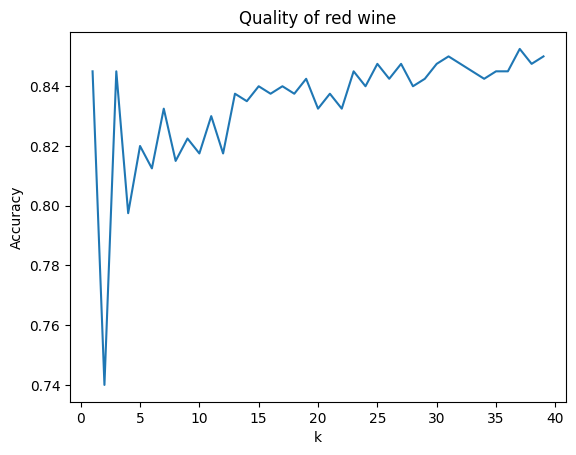

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1, 40), scores_list)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Quality of red wine')
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV 
k_range = list(range(2, 40))
weight_options = ['uniform', 'distance']
metric = ["manhattan","euclidean","jaccard"]
param_grid = dict(n_neighbors=k_range, weights=weight_options, metric=metric)


In [26]:
knn = KNeighborsClassifier()

In [23]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)


In [24]:
grid.fit(X, y)

Fitting 5 folds for each of 228 candidates, totalling 1140 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'euclidean', 'jaccard'],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro', verbose=1)

In [27]:
print(grid.best_estimator_)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)


In [28]:
model_knn = grid.best_estimator_

In [31]:
scores = cross_val_score(model_knn, X_train, y_train, cv=10, scoring='f1_macro') 
scores

array([0.52395028, 0.46068376, 0.49896711, 0.61571176, 0.39904283,
       0.46010653, 0.56469379, 0.60309484, 0.48334264, 0.51169538])

In [33]:
scores.mean()

0.5121288925512675